In [ ]:
# STEP 1: Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# STEP 2: Download the dataset
url = "https://github.com/apaultomas/mydataset/raw/main/weather.csv"

In [ ]:
# STEP 3: Load the dataset
try:
    df = pd.read_csv(url)
except pd.errors.ParserError:
    print("Error: Failed to parse the CSV file. Please check if the dataset is in the correct format.")
    exit()

In [ ]:
# Identify the numerical feature that requires normalization
feature_to_normalize = "Pressure9am"
data_to_normalize = df[[feature_to_normalize]]

In [ ]:
# STEP 4: Apply Z-Score Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

In [ ]:
# STEP 5: Create a new DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=[feature_to_normalize])

In [ ]:
# STEP 6: Display the original and normalized datasets
print("Original Dataset:")
print(df[[feature_to_normalize]].head())

print("\nNormalized Dataset:")
print(df_normalized.head())

Original Dataset:
   Pressure9am
0       1019.7
1       1012.4
2       1009.5
3       1005.5
4       1018.3

Normalized Dataset:
   Pressure9am
0    -0.001350
1    -1.094644
2    -1.528966
3    -2.128031
4    -0.211023


In [ ]:
# STEP 7: Analyze the impact of Z-Score Normalization
print("\nOriginal Dataset Statistics:")
print(df[[feature_to_normalize]].describe())

print("\nNormalized Dataset Statistics:")
print(df_normalized.describe())


Original Dataset Statistics:
       Pressure9am
count   366.000000
mean   1019.709016
std       6.686212
min     996.500000
25%    1015.350000
50%    1020.150000
75%    1024.475000
max    1035.700000

Normalized Dataset Statistics:
        Pressure9am
count  3.660000e+02
mean  -2.135511e-14
std    1.001369e+00
min   -3.475928e+00
25%   -6.528336e-01
50%    6.604447e-02
75%    7.137836e-01
max    2.394910e+00


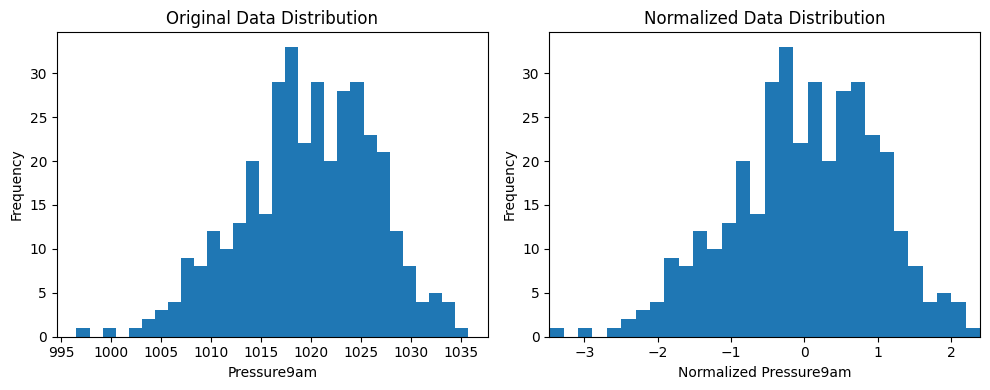

In [ ]:
# STEP 8: Visualization
plt.figure(figsize=(10, 4))

# Original data distribution
plt.subplot(1, 2, 1)
plt.hist(df[feature_to_normalize], bins=30)
plt.title("Original Data Distribution")
plt.xlabel(feature_to_normalize)
plt.ylabel("Frequency")

# Normalized data distribution
plt.subplot(1, 2, 2)
plt.hist(df_normalized[feature_to_normalize], bins=30)
plt.title("Normalized Data Distribution")
plt.xlabel("Normalized " + feature_to_normalize)
plt.ylabel("Frequency")

# Adjust x-axis range for normalized data
plt.xlim(df_normalized[feature_to_normalize].min(), df_normalized[feature_to_normalize].max())

plt.tight_layout()
plt.show()